# Модель движения машин без визуализации. Изначально на участке дороги есть машины.

In [33]:
import time
import random
import numpy as np
import math

In [34]:
v_max = 240 # максимальная скорость
l_min = 20 + 20 # мин расстояние до след. машины
t = 0.1 # время опроса
alpha = 0.3 # коэффициент ускорения
len_of_road = 5000 # длина дороги

In [35]:
class car():    
    def nearest_cars(self):
        n_h = None 
        n_t = None 
        p_h = None 
        p_t = None
        l_next_h = len_of_road+10000
        l_prev_h = -10000
        l_next_t = len_of_road+10000
        l_prev_t = -10000
        for car_ in self.cars_list:
            if (self.line == car_.line):
                if car_.x - self.x < 0:
                    if car_.x - self.x > l_prev_h:
                        l_prev_h = car_.x - self.x
                        p_h = car_
                if car_.x - self.x > 0:
                    if car_.x - self.x < l_next_h:
                        l_next_h = car_.x - self.x
                        n_h = car_
            else:
                if car_.x - self.x < 0:
                    if car_.x - self.x > l_prev_t:
                        l_prev_t = car_.x - self.x
                        p_t = car_
                if car_.x - self.x >= 0:
                    if car_.x - self.x < l_next_t:
                        l_next_t = car_.x - self.x
                        n_t = car_
        # теперь краевые случаи
        if n_h == None:
            for car_ in last_c:
                if car_.line == self.line:
                    n_h = car_
        if n_t == None:
            for car_ in last_c:
                if car_.line != self.line:
                    n_t = car_
                    
        if p_h == None:
            for car_ in last_c:
                if car_.line == self.line:
                    p_h = car_
        if p_t == None:
            for car_ in last_c:
                if car_.line != self.line:
                    p_t = car_  
            
        result = [n_h, n_t, p_h, p_t]
        return(result)
    
    def __init__(self, x0, v0, line, cars_list = None):
        self.size = [20, 10]
        self.v = v0
        self.x = x0
        self.line = line
        self.a = 0
        self.cars_list = cars_list
        if cars_list != None:
            n_cars = self.nearest_cars()
        self.next_here = None # ссылка на следующуу машину в этом ряду
        self.next_there = None # ссылка на следующую машину в соседнем ряду
        self.prev_here = None 
        self.prev_there = None
        #self.l = self.next_here.x - self.x
        
        if line == 1:
            self.y = 240
        else:
            self.y = 260
         
    def obgon(self):
        if self.line == 1:
            self.line = 2
            dy = 20
            self.y = 260
        else:
            self.line = 1
            dy = -20
            self.y = 240
        
        n_cars = self.nearest_cars()
        self.next_here = n_cars[0] 
        self.next_there = n_cars[1]
        self.prev_here = n_cars[2] 
        self.prev_there = n_cars[3]
           
    def draw(self):
        #---------------1-------------
        n_cars = self.nearest_cars()
        self.next_here = n_cars[0] 
        self.next_there = n_cars[1]
        self.prev_here = n_cars[2] 
        self.prev_there = n_cars[3]
        
        self_l = self.next_here.x - self.x
        #--------------2-------------
        dx = self.v * t + (self.a * (t**2))/2
        old_x = self.x
        self.x = self.x + dx
        #--------------3------------
        self.l = self.next_here.x - self.x
        if self.l <= l_min + 10:
            if (self.next_there.x - self.x > l_min*2) & (self.x - self.prev_there.x > l_min*2):
                self.obgon()
        
        la = self.l - l_min - 40 # здесь задается расстояние для рассчета ускорения
        anew = la * alpha
        vnew = self.v + self.a * t
        if vnew < 0:
            vnew = 0
        if (vnew > v_max):
            vnew = v_max
            anew = 0
        if (self.l < l_min):
            vnew = self.next_here.v
            self.l = l_min
            
        self.v = vnew
        self.a = anew
        #-------------4--------------
        if self.x > len_of_road:
            ind = self.cars_list.index(self)
            self.cars_list.pop(ind)
        else:
            delta = self.x - old_x 
        

In [36]:
first_1 = car(-100, 0, 1)
first_2 = car(-100, 0, 2)
last_1 = car(len_of_road+100, 0, 1)
last_2 = car(len_of_road+100, 0, 2)
last_c = [last_1, last_2]
first_c = [first_1, first_2]

In [37]:
# задать массив скоростей
arv = []
for i in range(100):
    arv.append(150)

# задать массив координат
while(1):
    ar = []
    for i in range(100):
        ar.append(int(random.uniform(0, len_of_road)))
    ar = sorted(ar)
    for i in range(99):
        if ar[i + 1] - ar[i] < l_min:
            continue
    break

# задать массив полосы
lines = []
for i in range(100):
    lines.append(random.randint(1, 2))

In [51]:
cars = []
for i in range(100):
    car_ = car(ar[i], arv[i], lines[i], cars)
    cars.append(car_)
for car_ in cars:
    n_cars = car_.nearest_cars()
    car_.next_here = n_cars[0] # ссылка на следующуу машину в этом ряду
    car_.next_there = n_cars[1] # ссылка на следующую машину в соседнем ряду
    car_.prev_here = n_cars[2] 
    car_.prev_there = n_cars[3]

In [52]:
import pandas as pd

In [53]:
# функция, считающая среднее значение скорости
def v_sr(cars):
    res = 0
    for c in cars:
        res += c.v
    res = res/len(cars)
    return res

# среднее значение vi - vi+1
def v_razn(cars):
    res = 0
    for c in cars:
        razn = c.v - c.next_here.v
        res += razn
    res = res/len(cars)
    return res

# среднее значение vi/vi+1
def v_del(cars):
    res = 0
    for c in cars:
        if c.next_here.v == 0:
            d = c.v / 0.001
        else:
            d = c.v / c.next_here.v
        res += d
    res = res/len(cars)
    return res

# Пробка
def prob(cars):
#     len_uch = 5000/5
#     res = []
#     dor = 0
#     for uch in range(1, 6):
#         res_uch = 0
#         for c in cars:
#             if c.x < dor + uch*len_uch and c.x >= dor:
#                 res_uch += 1
#         res.append(res_uch)
#         dor += len_uch
#     return max(res)
    max_count = 0
    for car_ in cars:
        count = 0
        for car_2 in cars:
            if car_2.x >= car_.x - 500 and car_2.x < car_.x + 500:
                count += 1
        if count > max_count:
            max_count = count
    return max_count

In [54]:
def count_L(cars, line):
    x = 1000000
    for car_ in cars:
        if car_.x < x and car_.line == line:
            x = car_.x
    return x

In [55]:
Lines = [1, 2]
pr = []
v = []
v_v1 = []
v_v1_del = []
car_ = car(0, 150, 1, cars)
cars.append(car_)
for _ in range(3000):
    for line in Lines:
        L = count_L(cars, line)
        if L > 60:
            p = random.choice([1, 2, 3, 4])
            if p == 1:
                car_ = car(0, 150, line, cars)
                cars.append(car_)
    for car_ in cars:
        car_.draw()
    
    cars_tmp = []    
    for c in cars:
        if c.x <=len_of_road:
            cars_tmp.append(c)
    pr.append(prob(cars_tmp))
    v.append(v_sr(cars_tmp))
    v_v1.append(v_razn(cars))
    v_v1_del.append(v_del(cars_tmp))
    

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


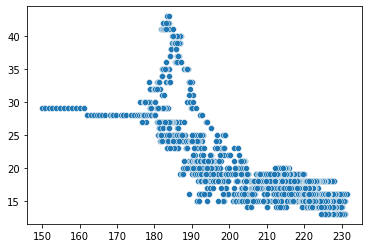

In [57]:
sns.scatterplot(v, pr)

In [58]:
import pandas as pd

In [59]:
df = pd.DataFrame()
df['pr'] = pr
df['v'] = v
df['v_v1'] = v_v1
df['v_v1_del'] = v_v1_del
df

,pr,v,v_v1,v_v1_del
0,29,150.000000,2.970297,2971.277228
1,29,150.759900,1.601100,1522.290654
2,29,151.724346,1.746811,1554.595602
3,29,152.752966,1.899841,1582.877394
4,29,153.758147,0.458401,1.004395
...,...,...,...,...
2995,18,207.614267,2.669068,913.996781
2996,19,209.881323,3.193792,1348.949706
2997,19,210.302608,4.177136,2270.772840
2998,19,210.755723,4.226709,2301.930744


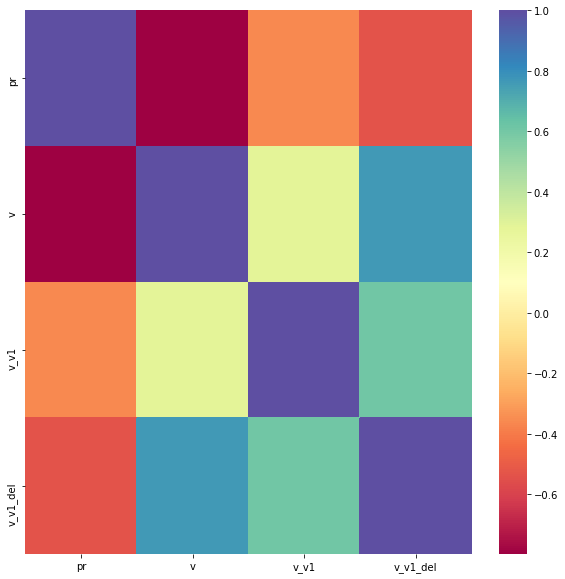

In [60]:
plt.figure(figsize=(10, 10))
sub_sample_corr = df.corr()
sns.heatmap(sub_sample_corr, cmap='Spectral')
plt.show()

C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000023E4319C208>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys
C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000023E42F77A20>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  import sys


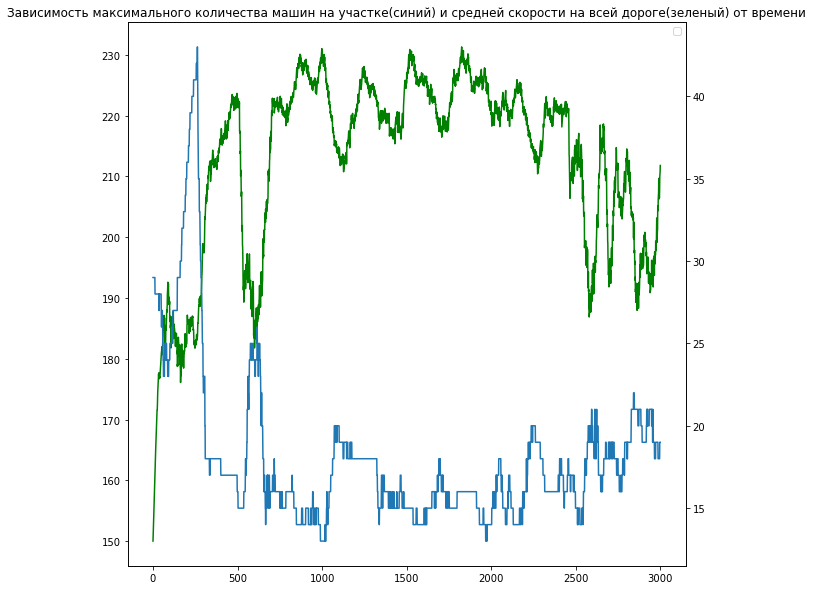

In [61]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)
v_ = ax1.plot(v, color = 'g', label = 'скорость')
ax2 = ax1.twinx()
pr_ = ax2.plot(pr, label = 'пробки')
plt.title('Зависимость максимального количества машин на участке(синий) и средней скорости на всей дороге(зеленый) от времени')
plt.legend((v_, pr_), ('скорость', 'пробки'))
plt.show()

C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000023E42FD4240>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000023E43038C88>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


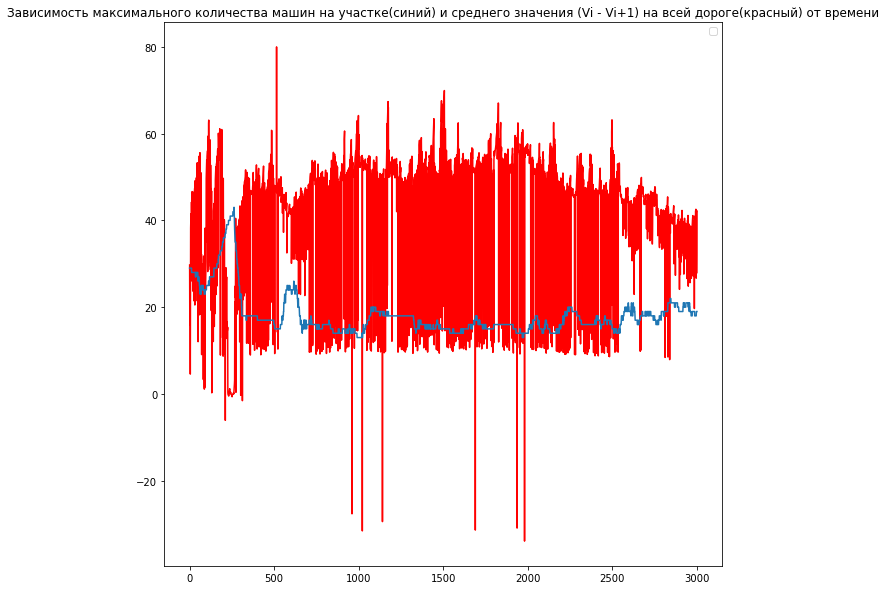

In [62]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)
v_ = ax1.plot(np.asarray(v_v1)*10, color = 'r', label = 'скорость')
pr_ = ax1.plot(pr, label = 'пробки')
plt.title('Зависимость максимального количества машин на участке(синий) и среднего значения (Vi - Vi+1) на всей дороге(красный) от времени')
plt.legend([v_, pr_], ['скорость', 'пробки'])
plt.show()

C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000023E43084B00>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
C:\ProgramData\Anaconda3\envs\Coursera\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000023E430A5400>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


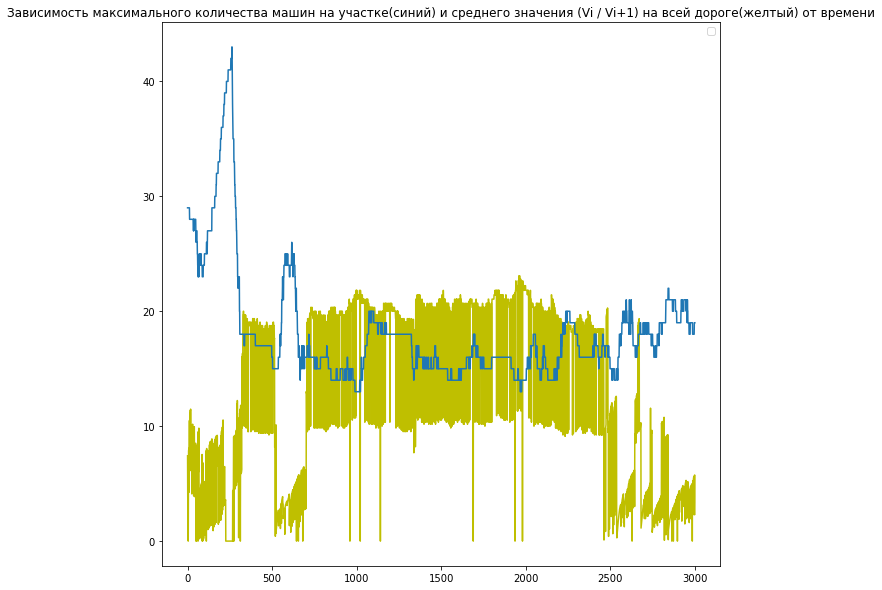

In [63]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(111)
v_ = ax1.plot(np.asarray(v_v1_del)/400, color = 'y', label = 'скорость')
pr_ = ax1.plot(pr, label = 'пробки')
plt.title('Зависимость максимального количества машин на участке(синий) и среднего значения (Vi / Vi+1) на всей дороге(желтый) от времени')
plt.legend([v_, pr_], ['скорость', 'пробки'])
plt.show()